In [1]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image as conToIm

In [2]:
file = r'C:\Users\mritu\OneDrive\Desktop\MAJOR PROJECT\b_tech\b_tech\001\bg-01\000\*.png'
imgPath = glob.glob(file)

In [3]:
images = [cv.imread(image) for image in imgPath]

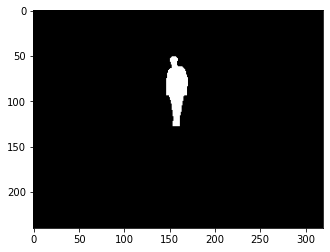

In [4]:
type(images)
len(images)
plt.imshow(images[0])
plt.show()

In [5]:



def center_person(img, size, method="simple"):
    """
    :param img: grey image, numpy.array datatype
    :param size: tuple, for example(120, 160), first number for height, second for width
    :param method: string, can be 'sample', or 'gravity'
    :return:
    """

    best_index = 0
    origin_height, origin_width = img.shape
    if method == "simple":
        highest = 0
        for i in range(origin_width):
            data = img[:, i]
            for j, val in enumerate(data):

                # encounter body
                if (val > 0).all():
                    now_height = origin_height - j
                    if now_height > highest:
                        highest = now_height
                        best_index = i
                    break
    else:
        pixel_count = []
        for i in range(origin_width):
            pixel_count.append(np.count_nonzero(img[:, i]))
        count_all = sum(pixel_count)
        pixel_percent = [count * 1.0 / count_all for count in pixel_count]
        count_percent_sum = 0
        min_theta = 1
        for i, val in enumerate(pixel_percent):
            tmp = abs(0.5 - count_percent_sum)
            if tmp < min_theta:
                min_theta = tmp
                best_index = i
            count_percent_sum += val

    left_part_column_count = best_index
    right_part_column_count = origin_width - left_part_column_count - 1

    if left_part_column_count == right_part_column_count:
        return imresize(img, size)
    elif left_part_column_count > right_part_column_count:
        right_padding_column_count = left_part_column_count - right_part_column_count
        new_img = np.zeros((origin_height, origin_width +
                           right_padding_column_count), dtype=np.int)
        new_img[:, :origin_width] = img
    else:
        left_padding_column_count = right_part_column_count - left_part_column_count
        new_img = np.zeros((origin_height, origin_width +
                           left_padding_column_count), dtype=np.int)
        new_img[:, left_padding_column_count:] = img

    return cv.resize(new_img.astype(float), size)

In [6]:
import logging
import numpy as np
logger = logging.getLogger("tool")
# from warnings import filterwarnings
# filterwarnings(action='ignore', category=DeprecationWarning, message='`np.int` is a deprecated alias')

def build_GEI(img_list):
    """
    :param img_list: a list of grey image numpy.array data
    :return:
    """
    norm_width = 240
    norm_height = 240
    result = np.zeros((norm_height, norm_width), dtype=np.int32)

    human_extract_list = []
    for img in img_list:
        # try:
            human_extract_list.append(center_person(img, (norm_height, norm_width)))
        # except:
        #     logger.warning("fail to extract human from image")
    try:
        result = np.mean(human_extract_list, axis=0)
        
    except:
        logger.warning("fail to calculate GEI, return an empty image")

    return result.astype(np.uint8)

In [14]:
person = ['005','006','007','008','009','010']
orientation_list = ['bg-01','bg-02','cl-01','cl-02','nm-01','nm-02','nm-03','nm-04','nm-05','nm-06']
list = ['000','018','036','054','072','090','108','126','144','162','180']
# '001','002','003','004',
import os

for per in person:
    for orl in orientation_list:
        folderPath = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}"
        if not os.path.exists(folderPath):
            continue
        dir = os.path.join(folderPath, "GEI")
        if not os.path.exists(dir):
            os.mkdir(dir)
        for i in list:
            basePath = f"{folderPath}\\{i}"
            if not os.path.exists(basePath):
                continue 
            ext1 = "\\*"

            file1 = f"{basePath}{ext1}"
            imgPath = glob.glob(file1 )
            images = [cv.imread(image) for image in imgPath]
            new_img = []
            for im in images:
                im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
                new_img.append(im)
            res = build_GEI(new_img)
            imName = f"GEI_{per}_{orl}_{i}.png"
            path = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}\\GEI\\{imName}"
            cv.imwrite(path,res)

C:\Users\mritu\AppData\Local\Temp/ipykernel_824/2432569306.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  left_padding_column_count), dtype=np.int)
C:\Users\mritu\AppData\Local\Temp/ipykernel_824/2432569306.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

In [20]:
import logging
import numpy as np
logger = logging.getLogger("tool")

def build_GENI(img_list):
    """
    :param img_list: a list of grey image numpy.array data
    :return:
    """
    norm_width = 240
    norm_height = 240
    result = np.zeros((norm_height, norm_width), dtype=np.int32)

    human_extract_list = []
    for img in img_list:
        # try:
            human_extract_list.append(center_person(img, (norm_height, norm_width)))
        # except:
        #     logger.warning("fail to extract human from image")
    try:
        z = np.mean(human_extract_list, axis=0)
        one = np.ones([240,240],dtype=np.int32)*255
        t = one-z
        
        log_1 = np.log2(z, where= z > 0)
        log_1[z<=0] = 0

        print(log_1.shape)
        log_2 = np.log2(t, where= t > 0)
        log_2[t<=0] = 0


        p1 = np.multiply(z,log_1)

        p2 = np.multiply(t,log_2)

        print(p2.shape)
        result = -p1 - p2

        # result = -(z*np.log2(z))-((1-z)*np.log2(1-z))
    except:
        logger.warning("fail to calculate GEI, return an empty image")
    # plt.imshow(result.astype(np.int32))
    # plt.show()
    print(result.shape)
    return result.astype(np.uint8)

In [21]:
person = ['001','002','003','004','005','006','007','008','009','010']
orientation_list = ['bg-01','bg-02','cl-01','cl-02','nm-01','nm-02','nm-03','nm-04','nm-05','nm-06']
list = ['000','018','036','054','072','090','108','126','144','162','180']

import os

for per in person:
    for orl in orientation_list:
        folderPath = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}"
        if not os.path.exists(folderPath):
            continue
        dir = os.path.join(folderPath, "GENI_new")
        if not os.path.exists(dir):
            os.mkdir(dir)
        for i in list:
            basePath = f"{folderPath}\\{i}"
            if not os.path.exists(basePath):
                continue 
            ext1 = "\\*.png"
            ext2 = "\\*.jpg"

            file1 = f"{basePath}{ext1}"
            file2 = f"{basePath}{ext2}"
            imgPath = glob.glob(file1 or file2)
            images = [cv.imread(image) for image in imgPath]
            new_img = []
            for im in images:
                im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
                new_img.append(im)
            # print(im.shape)
            res = build_GENI(new_img)
            #    cv.imshow("gray Image", res)
            #    cv.waitKey(0)
            #    cv.destroyAllWindows()
            imName = f"GENI_{per}_{orl}_{i}.png"
            path = f"C:\\Users\\mritu\\OneDrive\\Desktop\\MAJOR PROJECT\\b_tech\\b_tech\\{per}\\{orl}\\GENI_new\\{imName}"
            cv.imwrite(path,res)

C:\Users\mritu\AppData\Local\Temp/ipykernel_16288/1385111505.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  left_padding_column_count), dtype=np.int)


(240, 240)
(240, 240)
(240, 240)


C:\Users\mritu\AppData\Local\Temp/ipykernel_16288/1385111505.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  right_padding_column_count), dtype=np.int)


(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)

c:\Users\mritu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mritu\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
fail to calculate GEI, return an empty image


(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)

fail to calculate GEI, return an empty image


(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)